In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
import copy

In [2]:
with open("SavedFeatures/final_feature_vector.json", 'r') as f:
    XY = json.load(f)

In [4]:
# XY[0]

In [5]:
# XY[1]

In [164]:
step = 50000000
lo = 0
clss = 0
num_classes = 7

while(lo < step*(num_classes-1) + 1):
    hi = lo + step
    lo_txt = lo
    hi_txt = hi
    if(lo_txt == 0):
        lo_txt = '---'
    if(lo_txt == step*(num_classes-1)):
        hi_txt = '+++'
    print('{} to {} :: {}'.format(lo_txt, hi_txt, clss))

    clss += 1
    lo += step

--- to 50000000 :: 0
50000000 to 100000000 :: 1
100000000 to 150000000 :: 2
150000000 to 200000000 :: 3
200000000 to 250000000 :: 4
250000000 to 300000000 :: 5
300000000 to +++ :: 6


In [9]:
len(XY)

8181

In [10]:
def getClass(revenue):
    clss = revenue//step
    return min(clss, num_classes-1)

In [61]:
xrr = []
yrr = []
frq_dst = {}
thresh = 200

for i in range(num_classes):
    frq_dst[i] = 0

for xy in XY:
    clss = getClass(xy['target'])
    if(thresh != -1 and frq_dst[clss] >= thresh):
        continue
    xrr.append(xy['feature'])
    yrr.append(clss)
    frq_dst[clss] += 1
frq_dst

{0: 200, 1: 200, 2: 200, 3: 200, 4: 200, 5: 177, 6: 200}

In [62]:
# xrr[0], xrr[1]

# Normalize

In [63]:
mxrr = np.zeros(len(xrr[1]))
len(mxrr)

178

In [64]:
for feature in xrr:
    for i in range(len(feature)):
        mxrr[i] = max(mxrr[i], feature[i])

In [65]:
mnrr = copy.deepcopy(mxrr)

for feature in xrr:
    for i in range(len(feature)):
        mnrr[i] = min(mnrr[i], feature[i])

In [66]:
# mxrr

In [67]:
# mnrr

In [68]:
(len(xrr[0]) , len(xrr))

(178, 1377)

In [69]:
nxrr = np.zeros( (len(xrr) , len(xrr[0])) )

for i in range(len(xrr)):
#     print(i)
    for j in range(len(xrr[i])):
        if(mxrr[j]-mnrr[j] != 0): 
            nxrr[i][j]= (xrr[i][j] - mnrr[j]) / (mxrr[j] - mnrr[j])
#             print(i, j, nxrr[i][j])
#     if(i == 3):
#         break

In [70]:
xrr[0][0],xrr[1][0]

(272987802, 190053769)

In [71]:
nxrr[0][0], nxrr[1][0]

(0.7574626453164661, 0.5273292993370051)

In [72]:
xrr = np.array(xrr)
nxrr = np.array(nxrr)
yrr = np.array(yrr)

xrr.shape, nxrr.shape, yrr.shape

((1377, 178), (1377, 178), (1377,))

# Train-test split

In [169]:
# def turnIntoOrdinalOnehot(clss):
#     one_hot = [0]*num_classes
#     for i in range(clss+1):
#         one_hot[i] = 1
#     return one_hot

In [188]:
# def turnIntoOrdinalOnehot__Vector(labels):
#     onehot_vec = []
#     for i in range(len(labels)):
#         onehot_vec.append(turnIntoOrdinalOnehot(labels[i]))
#     return np.array(onehot_vec)

In [232]:
X_train, X_test, y_train, y_test = train_test_split(nxrr, yrr, test_size=0.30, random_state=17)
y_train_trans = y_train.reshape(-1, 1)
y_test_trans = y_test.reshape(-1, 1)
# y_train_tarns = turnIntoOrdinalOnehot__Vector(y_train)

In [233]:
# turnIntoOrdinalOnehot(y_train[2])

In [234]:
# turnIntoOrdinalOnehot__Vector([0,1,2,3])

In [235]:
y_train_trans[10], y_train[10]

(array([2]), 2)

In [236]:
X_train.shape, y_train.shape, y_train_trans.shape

((963, 178), (963,), (963, 1))

In [237]:
X_test.shape, y_test.shape, y_test_trans.shape

((414, 178), (414,), (414, 1))

In [238]:
from sklearn import preprocessing

onehot = preprocessing.OneHotEncoder()
onehot.fit(y_train_trans)

OneHotEncoder()

In [239]:
y_train_ohe = onehot.transform(y_train_trans).toarray()
y_test_ohe = onehot.transform(y_test_trans).toarray()

In [240]:
y_train_ohe.shape, y_test_ohe.shape

((963, 7), (414, 7))

In [241]:
idx = 100
y_train[idx], y_train_trans[idx]

(4, array([4]))

# DNN

In [242]:
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [243]:
from tensorflow.keras import backend

In [244]:
def custom_loss(y_true, y_pred):
    true_val = tf.argmax(y_true)
    pred_val = tf.argmax(y_pred)
    # print(true_val.numpy(), pred_val.numpy(), tf.square(true_val - pred_val).numpy())
    # return tf.reduce_mean(tf.square(y_true-y_pred))
    loss = tf.square(true_val - pred_val)
    return tf.reduce_mean(tf.cast(loss, tf.float64))

In [245]:
a = 10
b = 131
y_train[a], y_train[b]

(2, 5)

In [247]:
custom_loss(y_train_ohe[a], y_train_ohe[b]).numpy()

9.0

In [248]:
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model. kernel_initializer='he_normal'))
model.add(softmaxum_classes, activation='softmax'))

In [249]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')
# fit the model
model.fit(X_train, y_train_ohe, epochs=15, batch_size=32, verbose=1)

Train on 963 samples
Epoch 1/15
963/963 [==============================] - 1s 919us/sample - loss: 1.9425
Epoch 2/15
963/963 [==============================] - 0s 195us/sample - loss: 1.8526
Epoch 3/15
963/963 [==============================] - 0s 198us/sample - loss: 1.7632
Epoch 4/15
963/963 [==============================] - 0s 183us/sample - loss: 1.6851
Epoch 5/15
963/963 [==============================] - 0s 214us/sample - loss: 1.6376
Epoch 6/15
963/963 [==============================] - 0s 197us/sample - loss: 1.6065
Epoch 7/15
963/963 [==============================] - 0s 193us/sample - loss: 1.5686
Epoch 8/15
963/963 [==============================] - 0s 181us/sample - loss: 1.5371
Epoch 9/15
963/963 [==============================] - 0s 210us/sample - loss: 1.5024
Epoch 10/15
963/963 [==============================] - 0s 189us/sample - loss: 1.4688
Epoch 11/15
963/963 [==============================] - 0s 226us/sample - loss: 1.4512
Epoch 12/15
963/963 [=====================

In [251]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

ValueError: You are passing a target array of shape (414, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

In [252]:
row = np.array([X_test[10]])
yhat = model.predict(row)
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)), y_test[10])

Predicted: [[0.06625419 0.17085303 0.22725    0.2612418  0.07377887 0.12903517
  0.07158692]] (class=3) 6


In [253]:
def getConfusionMatrix(target, predicted):
    classes = sorted(list(set(target)))
    matrix = {}
    for c in classes:
        matrix[c] = {}
        for cc in classes:
            matrix[c][cc] = 0
    for i in range(len(target)):
        t = target[i]
        p = predicted[i]

        matrix[t][p] += 1
    
    return matrix

In [254]:
def plotMatrix(dct2D):
    # print(dct2D)
    arr2D = []
    for ik in dct2D:
        arr1D = []
        for jk in dct2D[ik]:
            arr1D.append(dct2D[ik][jk])
        arr2D.append(arr1D)
    df_cm = pd.DataFrame(arr2D, index = list(dct2D.keys()),
                  columns = list(dct2D.keys()))
    plt.figure(figsize = (20,14))
    sn.heatmap(df_cm, annot=True)
    plt.show()

In [255]:
def getPrediction(model, X_test):
    pred = model.predict(X_test)
    y_hat = []
    for i in range(len(pred)):
        y_hat.append(np.argmax(pred[i]))
    return y_hat

In [256]:
matrix = getConfusionMatrix(y_test, getPrediction(model, X_test))

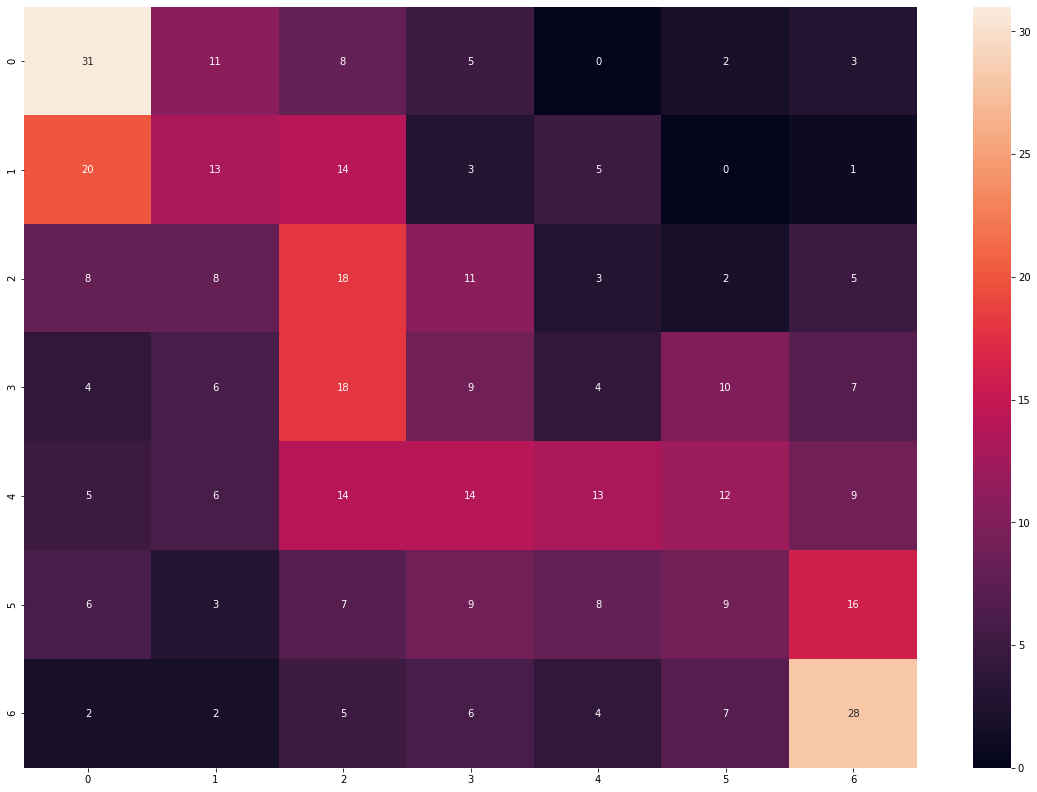

In [257]:
plotMatrix(matrix)

# Ordinal Regression (classification) resources

https://nbviewer.jupyter.org/github/fabianp/minirank/blob/master/notebooks/comparison_ordinal_logistic.ipynb
https://stackoverflow.com/questions/57561189/multi-class-multi-label-ordinal-classification-with-sklearn
https://www.ethanrosenthal.com/2018/12/06/spacecutter-ordinal-regression/
http://fa.bianp.net/blog/tag/ordinal-regression.html
https://www.statsmodels.org/devel/examples/notebooks/generated/ordinal_regression.html
https://pythonhosted.org/mord/
https://pypi.org/project/coral-ordinal/
https://github.com/sarvothaman/ordinal-classification
